In [158]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [159]:
# read data
df=pd.read_csv('Salary_Data_Based_country_and_race.csv')

In [160]:
df.head(100)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
95,95,39.0,Female,Bachelor's,Training Specialist,12.0,65000.0,USA,African American
96,96,47.0,Male,PhD,Research Scientist,22.0,160000.0,Australia,Asian
97,97,26.0,Male,Bachelor's,Junior Software Developer,1.0,35000.0,China,White
98,98,38.0,Female,Master's,Public Relations Manager,10.0,90000.0,UK,Asian


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [162]:
# cleaning data
df=df.drop('Unnamed: 0',axis=1)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [163]:
df[df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White


In [164]:
df.drop(df[df['Age'].isna()].index,inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6702 non-null   object 
 7   Race                 6702 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.2+ KB


In [166]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", nan, 'High School', 'phD'], dtype=object)

In [167]:
df['Education Level'].fillna('Not known',inplace=True)
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'Not known', 'High School', 'phD'], dtype=object)

In [168]:
df['Years of Experience'].unique()

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. , 27. ,
       34. , 29. , 26. , 32. ,  nan])

<AxesSubplot:xlabel='Years of Experience'>

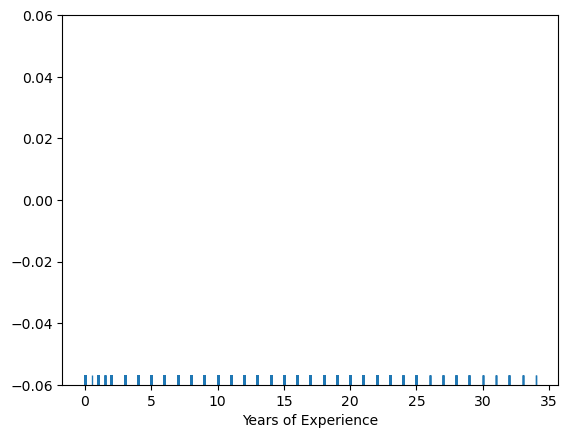

In [169]:
sns.rugplot(df['Years of Experience'])

In [170]:
mean_of_years=df['Years of Experience'].mean()
df['Years of Experience'].fillna(f"{mean_of_years:.1f}",inplace=True)
df['Years of Experience']=df['Years of Experience'].astype(float)
df['Years of Experience'].unique()

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5, 31. , 30. , 28. , 33. , 27. ,
       34. , 29. , 26. , 32. ,  8.1])

<AxesSubplot:xlabel='Salary'>

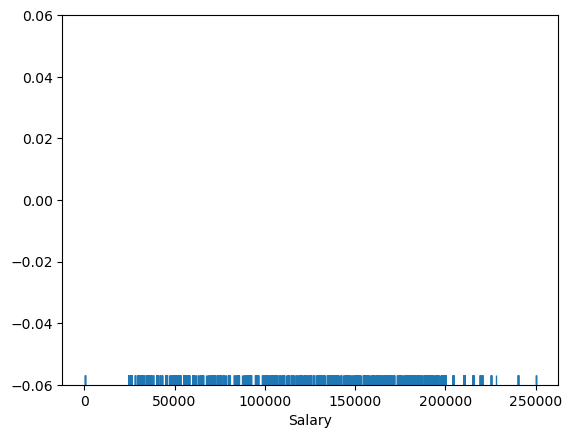

In [171]:
sns.rugplot(df['Salary'])

In [172]:
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6702 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6702 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6702 non-null   float64
 5   Salary               6702 non-null   float64
 6   Country              6702 non-null   object 
 7   Race                 6702 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.2+ KB


In [174]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6702.000000,6702.000000
mean,33.620859,8.094688,115326.964771
std,7.614633,6.058551,52774.366549
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


<AxesSubplot:xlabel='Age'>

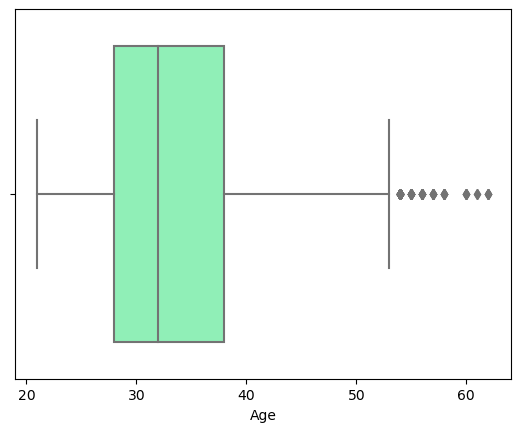

In [175]:
sns.boxplot(x='Age',data=df,palette='rainbow')

In [176]:
age_q1=df['Age'].quantile(0.25)
age_q2=df['Age'].median()
age_q3=df['Age'].quantile(0.75)
age_IQR=age_q3-age_q1
age_LB=age_q1-(1.5*age_IQR)
age_UB=age_q3+(1.5*age_IQR)

In [177]:
df=df[df['Age']<=60]

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6695 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6695 non-null   float64
 1   Gender               6695 non-null   object 
 2   Education Level      6695 non-null   object 
 3   Job Title            6695 non-null   object 
 4   Years of Experience  6695 non-null   float64
 5   Salary               6695 non-null   float64
 6   Country              6695 non-null   object 
 7   Race                 6695 non-null   object 
dtypes: float64(3), object(5)
memory usage: 470.7+ KB


<AxesSubplot:xlabel='Years of Experience'>

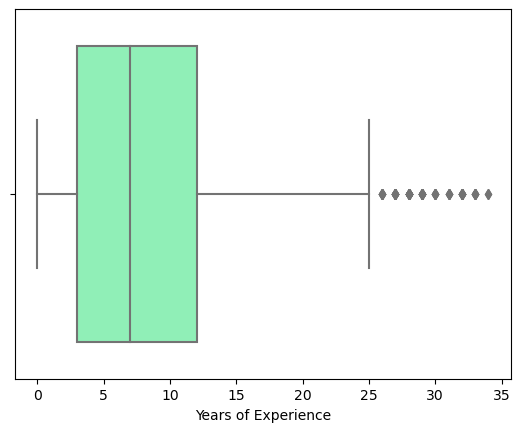

In [179]:
sns.boxplot(x='Years of Experience',data=df,palette='rainbow')

<AxesSubplot:xlabel='Salary'>

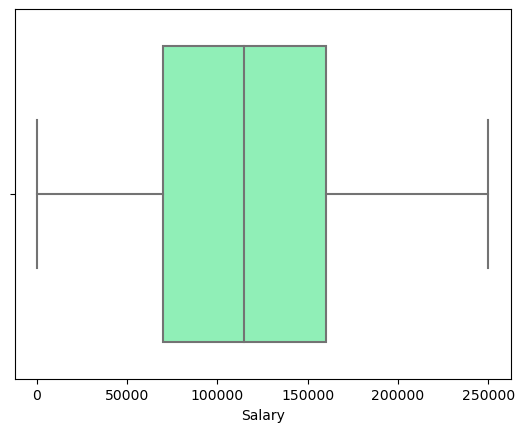

In [180]:
sns.boxplot(x='Salary',data=df,palette='rainbow')

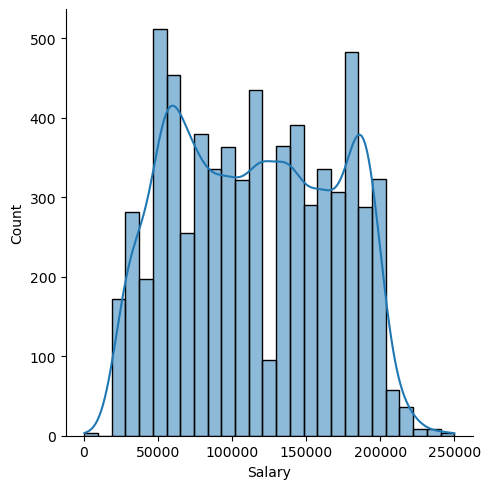

In [181]:
#data visualization
sns.displot(df['Salary'],kde=True)

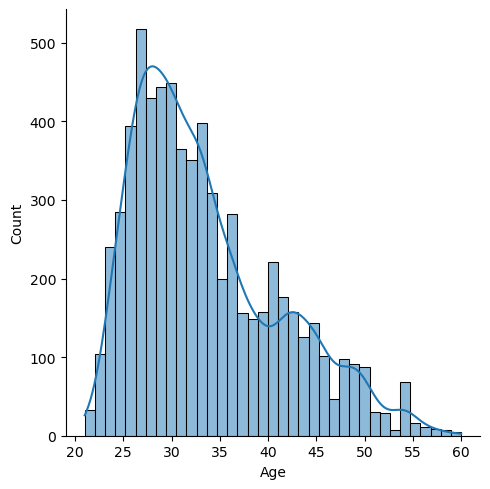

In [182]:
sns.displot(df['Age'],kde=True)

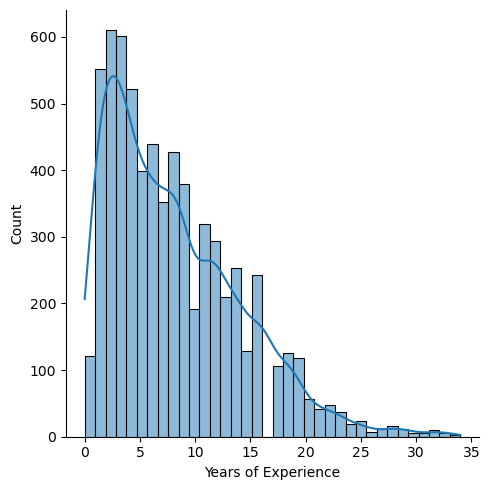

In [183]:
sns.displot(df['Years of Experience'],kde=True)

<AxesSubplot:>

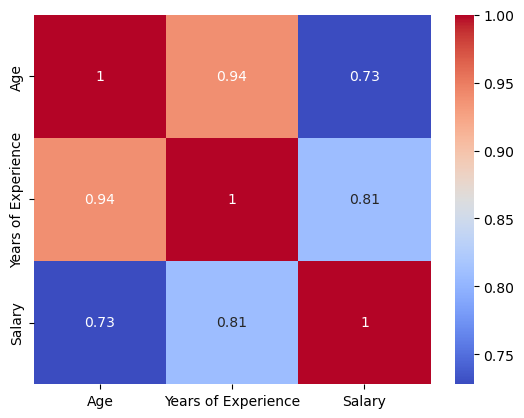

In [184]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='Years of Experience', ylabel='Age'>

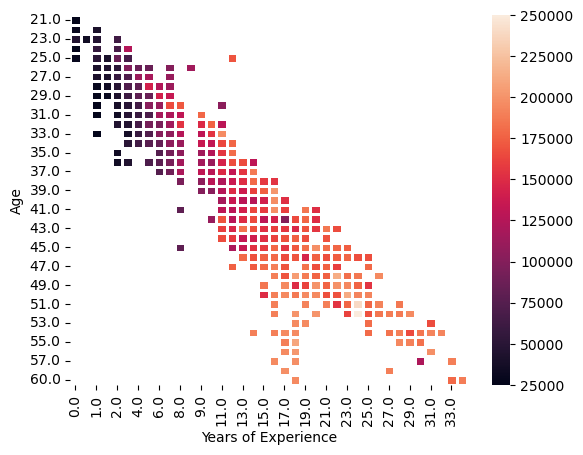

In [185]:
pv_df=df.pivot_table(values='Salary',index='Age',columns='Years of Experience')
sns.heatmap(pv_df,linecolor='white',linewidths=1)

In [186]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [187]:
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [188]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2,'Other':3})

C:\Users\omara\AppData\Local\Temp\ipykernel_15908\3796917670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].map({'Male':1,'Female':2,'Other':3})


In [189]:
Edu_lvl_lst=list(df['Education Level'].unique())

In [190]:
Edu_lvl_dict={}
j=1
for i in Edu_lvl_lst:
    Edu_lvl_dict[i]=j
    j+=1    

In [191]:
def update_Edu_lvl(lvl):
    return Edu_lvl_dict[lvl]
df['Education Level']=df['Education Level'].map(update_Edu_lvl)

C:\Users\omara\AppData\Local\Temp\ipykernel_15908\4163081508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level']=df['Education Level'].map(update_Edu_lvl)


In [192]:
job_lst=list(df['Job Title'].unique())

In [193]:
job_dict={}
j=1
for i in job_lst:
    job_dict[i]=j
    j+=1    

In [194]:
def update_job(title):
    return job_dict[title]
df['Job Title']=df['Job Title'].map(update_job)        

C:\Users\omara\AppData\Local\Temp\ipykernel_15908\2741770839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title']=df['Job Title'].map(update_job)


In [195]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,1,1,1,5.0,90000.0,UK,White
1,28.0,2,2,2,3.0,65000.0,USA,Hispanic
2,45.0,1,3,3,15.0,150000.0,Canada,White
3,36.0,2,1,4,7.0,60000.0,USA,Hispanic
4,52.0,1,2,5,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,2,3,47,20.0,200000.0,UK,Mixed
6700,32.0,1,7,4,3.0,50000.0,Australia,Australian
6701,30.0,2,4,25,4.0,55000.0,China,Chinese
6702,46.0,1,5,17,14.0,140000.0,China,Korean


In [196]:
# Polynomial Regression
X=df.iloc[:,:5]
Y=df.iloc[:,5]

In [197]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [198]:
poly_model=PolynomialFeatures(degree=5)
x_train_poly=poly_model.fit_transform(x_train)
x_test_poly=poly_model.transform(x_test)
LR_model=LinearRegression()
LR_model.fit(x_train_poly,y_train)

LinearRegression()

In [199]:
y_pred=LR_model.predict(x_test_poly)

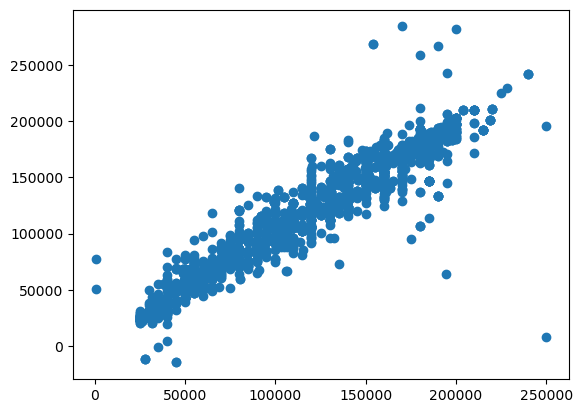

In [200]:
plt.scatter(y_test,y_pred)

In [201]:
#display Evaluation metrices 
print('MSE      :',metrics.mean_squared_error(y_test,y_pred))
print('MAE      :',metrics.median_absolute_error(y_test,y_pred))
print('RMSE     :',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2_score :',metrics.r2_score(y_test,y_pred))

MSE      : 241555967.1090089
MAE      : 6673.444239158183
RMSE     : 15542.070875819893
r2_score : 0.9136918421186191
